In [1]:
import gymnasium as gym
import sys
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
from itertools import accumulate
import operator
import seaborn as sns
pd.options.display.max_rows = 4000
np.set_printoptions(threshold = sys.maxsize)

In [2]:
def values_heat_map(data, title, size):
        data = np.around(np.array(data).reshape(size), 2)
        df = pd.DataFrame(data=data)
        sns.heatmap(df, annot=True).set_title(title)

In [3]:
def plot_policy(val_max, directions, map_size, title):
        """Plot the policy learned."""
        sns.heatmap(
            val_max,
            annot=directions,
            fmt="",
            cmap=sns.color_palette("Blues", as_cmap=True),
            linewidths=0.7,
            linecolor="black",
            xticklabels=[],
            yticklabels=[],
            annot_kws={"fontsize": "xx-large"},
        ).set(title=title)
        img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"

In [4]:
# Get holes in the map
hole_coords = []
saved_map = ['SFFFFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFHFFFH', 'FFFFFFFFFFFFHFHFFF', 'FFFFFFFFFFFHFFFHFF', 'FFFFFFFFFFFFHHFFHF', 'FHFFFFFFFFFFHFHFFF', 'FFFFFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFHFFFH', 'FFFFFFFFFFFFFFHHHF', 'HFFFFFFFFFFFFFHFFF', 'FFFHFFFFFFFFFFFFHF', 'FFHFFFFFFFFFFFFFHF', 'FFFFFFFFFFFFFFFHFF', 'FFFFFHFFFFFFFFHFFF', 'FFFFFFFFFFFFFFFFFF', 'HFHFHFFFFFFFFFFFFF', 'HFFHFFHFFFFFFFFFFF', 'HFFFHFFFFFFFFFFFFG']

for i in range(len(saved_map)):
    for j in range(len(saved_map[i])):
        if saved_map[i][j] == 'H':
            hole_coords.append((i,j))

In [5]:
# make gym environment 
m = generate_random_map(size=18)

# 20 x 20 
# saved_map = ['SFFFHFFFFFFFFFHFFHFF', 'FFFFHHFFFFFFFFFFFHFH', 'FHFFFFFHFFFHFFFFFFFF', 'FHHFFHHFFFFFFFFFFFFF', 'FFHFFFFFFHFFHFFFHFFF', 'FFFFFHFFHFFFFFFFFFFF', 'HHFFFHFHFFFFFFFFHFFH', 'FFFFFFFFHFFFFFFFFFFF', 'FFFHFFHFFFFFFFFFHHHH', 'FFHHHFFFHHFFHFFFFFHF', 'FFFFFFFFFFFFFHFHFFFF', 'FHFFFFFFFFFFFHHFHFFF', 'FFFFHHHFFFFFFFHFFFFF', 'FHFFFHFFFHFFFFFFFFFF', 'FFFFFFHHHHFHFFFFFFHF', 'HFFFFFFFFFFFFFFFFFFF', 'FFFFHFFFFFFFFFHFFFFF', 'FFFFHHHFFFHFFHFFFFFH', 'FHHFFFFFFFFFHHFFFFFF', 'FFFFFHFFFFHFFFFFFFHG']

# 16 x 16
# saved_map = ['SFFFFFHFFFFFHFFF', 'FFHFFFFFFFHHFFFH', 'FHFFFFFFFFFFFFHF', 'FHFFHFFFFHHFHFFF', 'HHFFFHFFFHHFHFFF', 'HFFFFFFFFFFFFFFF', 'HFFFFFFFFFFFHFFH', 'FFFHFFFFHFFFHFFF', 'FFHHFFFFHFFFFFFF', 'FFFHHFFFFFHFFFHF', 'FFFFFFHFFFHFFFFF', 'FFFFFFHFFFFFFHFF', 'FFHHHFFFFFFFFFFF', 'FFFFHHFFHFFFFFFF', 'FHHFFFFFFFFFFFFF', 'FHFFFFFFFFFFFFHG']

# 18 x 18
saved_map = ['SFFFFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFHFFFH', 'FFFFFFFFFFFFHFHFFF', 'FFFFFFFFFFFHFFFHFF', 'FFFFFFFFFFFFHHFFHF', 'FHFFFFFFFFFFHFHFFF', 'FFFFFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFHFFFH', 'FFFFFFFFFFFFFFHHHF', 'HFFFFFFFFFFFFFHFFF', 'FFFHFFFFFFFFFFFFHF', 'FFHFFFFFFFFFFFFFHF', 'FFFFFFFFFFFFFFFHFF', 'FFFFFHFFFFFFFFHFFF', 'FFFFFFFFFFFFFFFFFF', 'HFHFHFFFFFFFFFFFFF', 'HFFHFFHFFFFFFFFFFF', 'HFFFHFFFFFFFFFFFFG']

# 4 x 4
# saved_map = ['SFHH', 'FFFF', 'FFHF', 'HHHG']
frozen_lake = gym.make('FrozenLake-v1', desc=saved_map, is_slippery=True, render_mode=None)

## Grid Search

In [4]:
gamma=[.7, .9, .99, 1]
n_iters = [1000, 5000, 7500, 10000]
theta=[.001, .00001, 0.0000000001]
GridSearch.vi_grid_search(frozen_lake, gamma=gamma, n_iters=n_iters, theta=theta)

running VI with gamma: 0.7  n_iters: 1000  theta: 0.001
runtime = 0.04 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-10


/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.09 seconds
Avg. episode reward:  0.33
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 0.001
runtime = 0.02 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 1e-10
runtime = 0.09 seconds
Avg. episode reward:  0.49
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 0.001
runtime = 0.02 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 1e-10
runtime = 0.09 seconds
Avg. episode reward:  0.39
###################
running VI with gamma: 0.7  n_iters: 10000  theta: 0.001
runtime = 0.02 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 10000  theta: 1

/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 1.68 seconds
Avg. episode reward:  0.05
###################
running VI with gamma: 1  n_iters: 5000  theta: 0.001
runtime = 0.50 seconds
Avg. episode reward:  0.24
###################
running VI with gamma: 1  n_iters: 5000  theta: 1e-05
runtime = 1.02 seconds
Avg. episode reward:  0.22
###################
running VI with gamma: 1  n_iters: 5000  theta: 1e-10
runtime = 2.32 seconds
Avg. episode reward:  0.01
###################
running VI with gamma: 1  n_iters: 7500  theta: 0.001
runtime = 0.50 seconds
Avg. episode reward:  0.3
###################
running VI with gamma: 1  n_iters: 7500  theta: 1e-05
runtime = 1.03 seconds
Avg. episode reward:  0.2
###################
running VI with gamma: 1  n_iters: 7500  theta: 1e-10
runtime = 2.32 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 1  n_iters: 10000  theta: 0.001
runtime = 0.50 seconds
Avg. episode reward:  0.31
###################
running VI with gamma: 1  n_iters: 10000  theta: 1e-05
runtime =

## State values heat map

runtime = 1.21 seconds


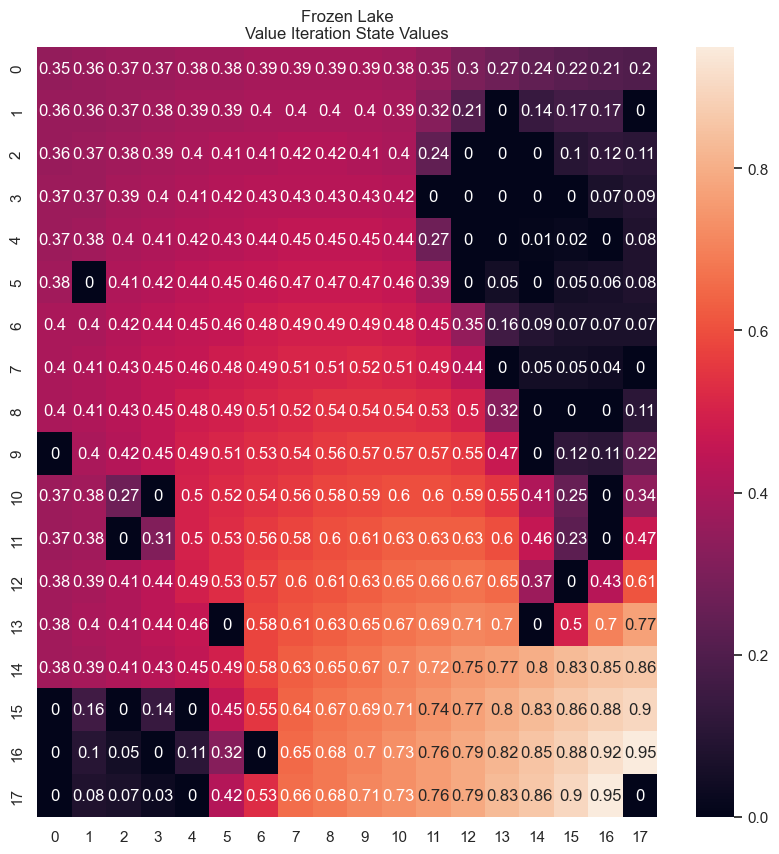

In [64]:
# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=5000, gamma=.99, theta=1e-10)


#plot state values
size=(18,18)
plt.figure(figsize=(10,10))
values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)
plt.savefig('plots/frozen_lake/VI_state_values.png', dpi=300)

In [65]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({0.0: 5526, 1.0: 4474})
0.4474


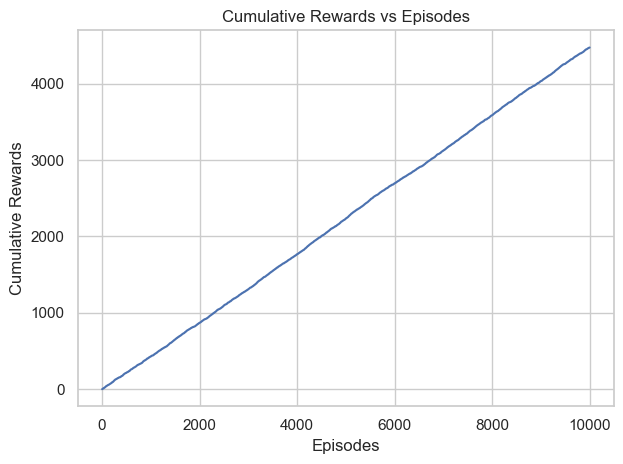

In [66]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_rewards_episodes.png', dpi=300)

## State values v. iterations

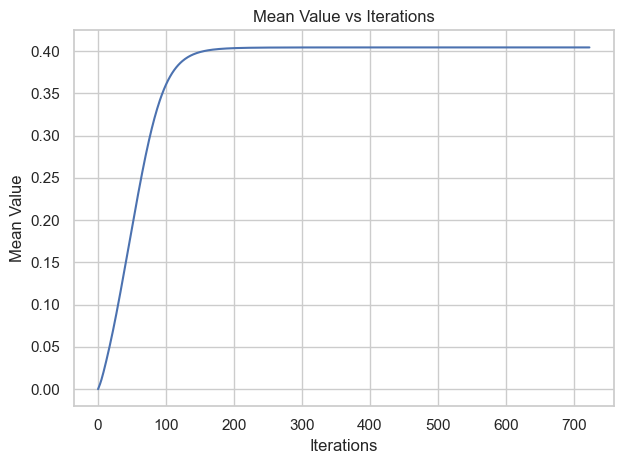

In [67]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_opt_val_iters.png', dpi=300)

## Gamma Changes

runtime = 2.31 seconds
runtime = 2.13 seconds
runtime = 1.95 seconds
runtime = 1.66 seconds
runtime = 1.18 seconds
runtime = 2.29 seconds
runtime = 2.03 seconds
runtime = 1.00 seconds
runtime = 0.20 seconds
runtime = 0.01 seconds


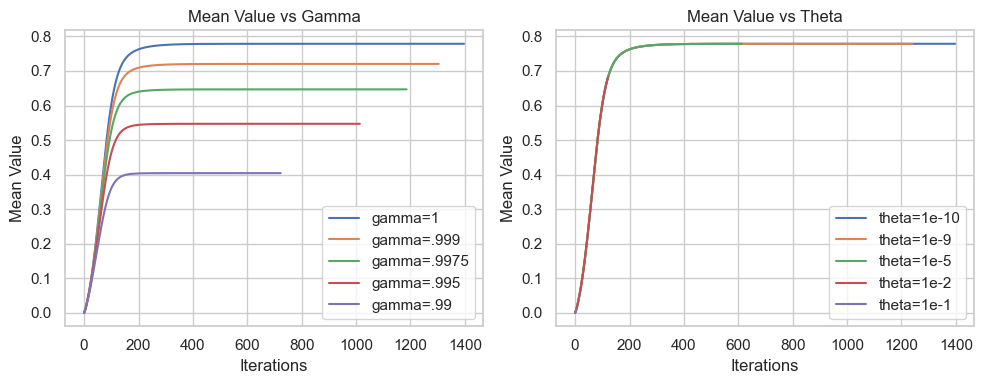

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-9)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-2)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_hyperparams_mean_value.png', dpi=300)

runtime = 2.32 seconds
runtime = 2.10 seconds
runtime = 1.93 seconds
runtime = 1.64 seconds
runtime = 1.17 seconds
runtime = 2.26 seconds
runtime = 2.02 seconds
runtime = 0.99 seconds
runtime = 0.20 seconds
runtime = 0.01 seconds


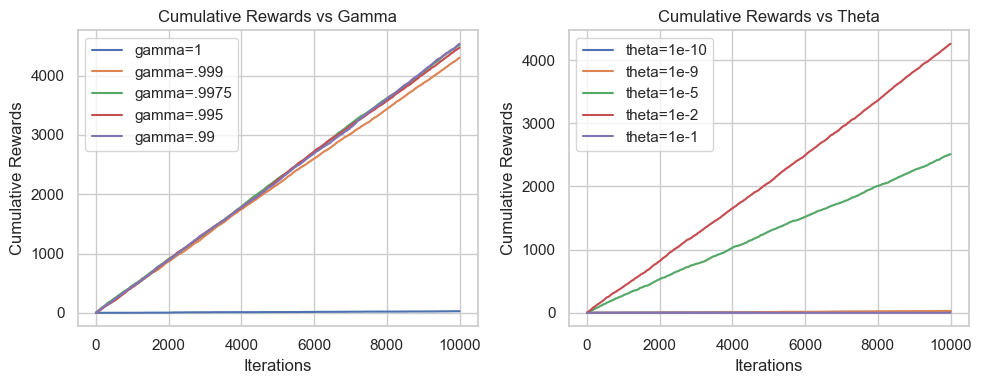

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.999)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.995)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-9)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-2)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_hyperparams_rewards.png', dpi=300)

## Policy maps

runtime = 1.23 seconds


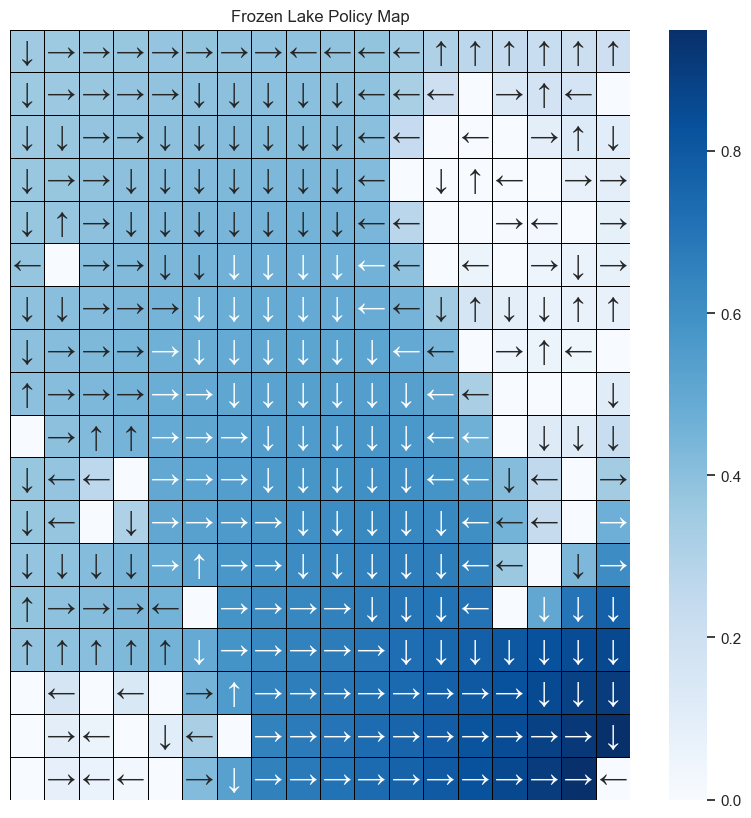

In [19]:
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=5000, gamma=.99, theta=1e-10)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(18,18)
title="Frozen Lake Policy Map"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)

for i in range(len(policy_map)):
    for j in range(len(policy_map[i])):
        if (i, j) in hole_coords:
            policy_map[i][j] = ''
plt.figure(figsize=(10,10))
plot_policy(val_max, policy_map, fl_map_size, title)
plt.savefig('plots/frozen_lake/VI_policy_map.png', dpi=300)

# Policy Iteration

## Grid Search

In [23]:
gamma=[.7, .9, .99, 1]
n_iters = [1000, 5000, 7500, 10000]
theta=[.001, .00001, 0.0000000001]
GridSearch.pi_grid_search(frozen_lake, gamma=gamma, n_iters=n_iters, theta=theta)

running PI with gamma: 0.7  n_iters: 1000  theta: 0.001
runtime = 0.06 seconds
Avg. episode reward:  0.43
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.39
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-10
runtime = 0.07 seconds
Avg. episode reward:  0.44
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 0.001
runtime = 0.04 seconds
Avg. episode reward:  0.43
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 1e-05
runtime = 0.05 seconds
Avg. episode reward:  0.4
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 1e-10
runtime = 0.06 seconds
Avg. episode reward:  0.4
###################
running PI with gamma: 0.7  n_iters: 7500  theta: 0.001
runtime = 0.04 seconds
Avg. episode reward:  0.45
###################
running PI with gamma: 0.7  n_iters: 7500  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.4
###############

runtime = 0.42 seconds


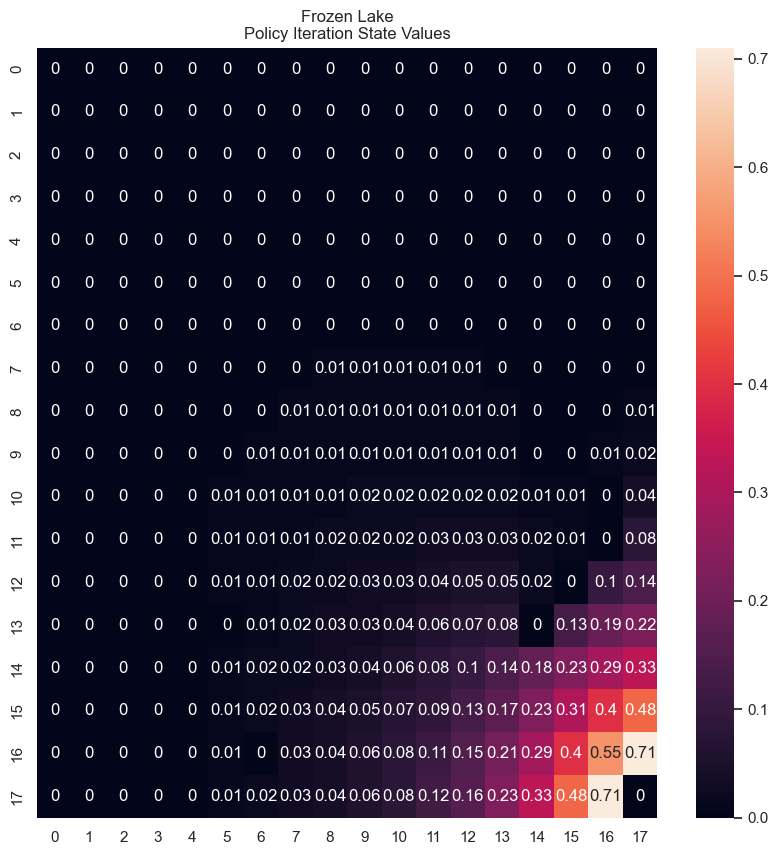

In [60]:
# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=7500, gamma=.9, theta=1e-10)


#plot state values
size=(18,18)
plt.figure(figsize=(10,10))
values_heat_map(V, "Frozen Lake\nPolicy Iteration State Values", size)
plt.savefig('plots/frozen_lake/PI_state_values.png', dpi=300)

In [61]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({0.0: 5436, 1.0: 4564})
0.4564


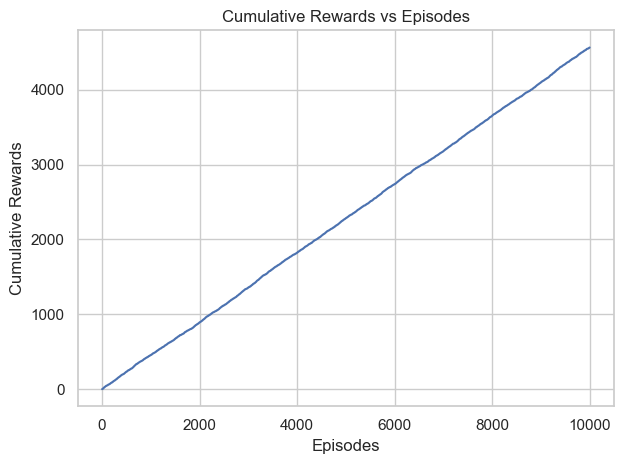

In [62]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_rewards_episodes.png', dpi=300)

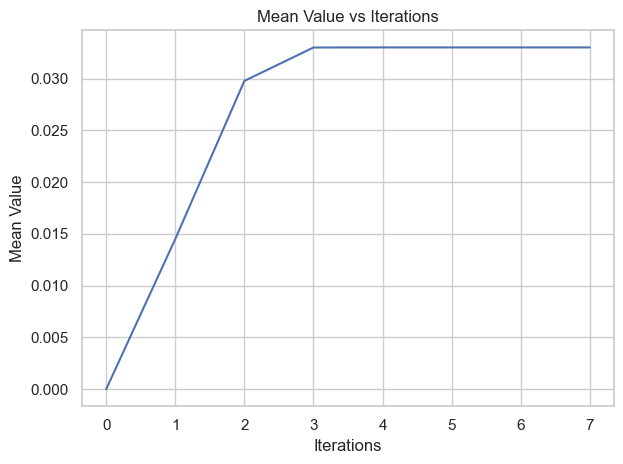

In [63]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_opt_val_iters.png', dpi=300)

runtime = 3.28 seconds
runtime = 1.89 seconds
runtime = 1.72 seconds
runtime = 1.25 seconds
runtime = 1.06 seconds
runtime = 4.99 seconds
runtime = 2.42 seconds
runtime = 0.64 seconds
runtime = 0.14 seconds
runtime = 0.06 seconds


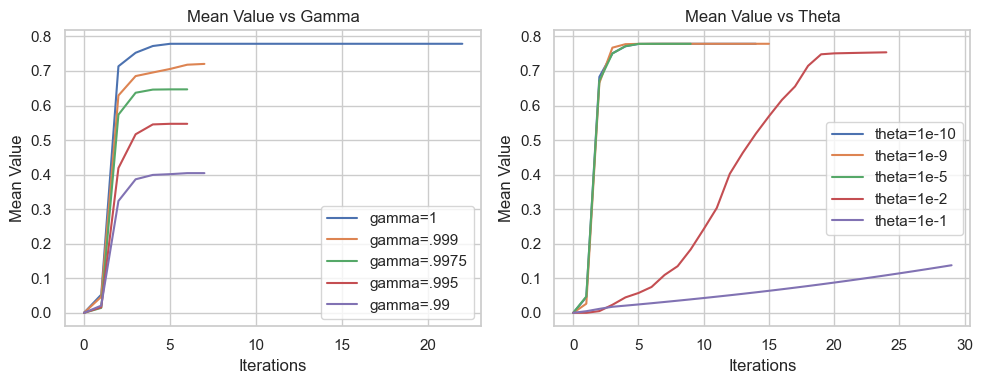

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-9)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-2)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_hyperparams_mean_value.png', dpi=300)

runtime = 6.34 seconds
runtime = 2.22 seconds
runtime = 1.87 seconds
runtime = 1.36 seconds
runtime = 0.92 seconds
runtime = 6.21 seconds
runtime = 5.10 seconds
runtime = 0.63 seconds
runtime = 0.11 seconds
runtime = 0.08 seconds


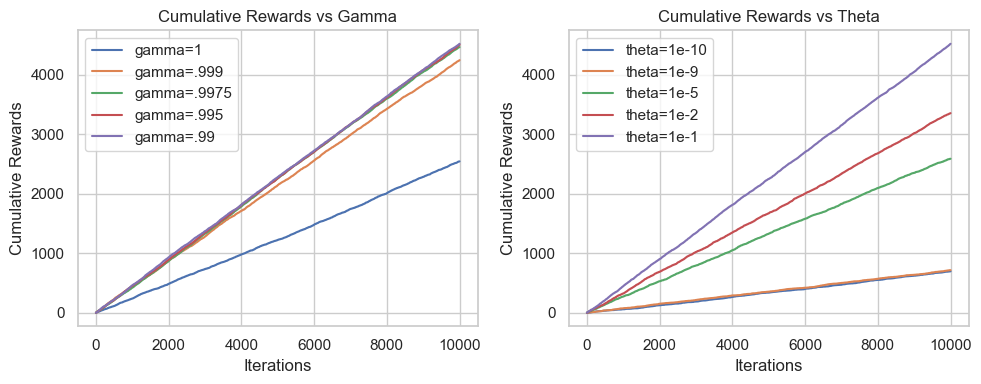

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.999)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.995)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-9)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-2)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_hyperparams_rewards.png', dpi=300)

runtime = 0.22 seconds


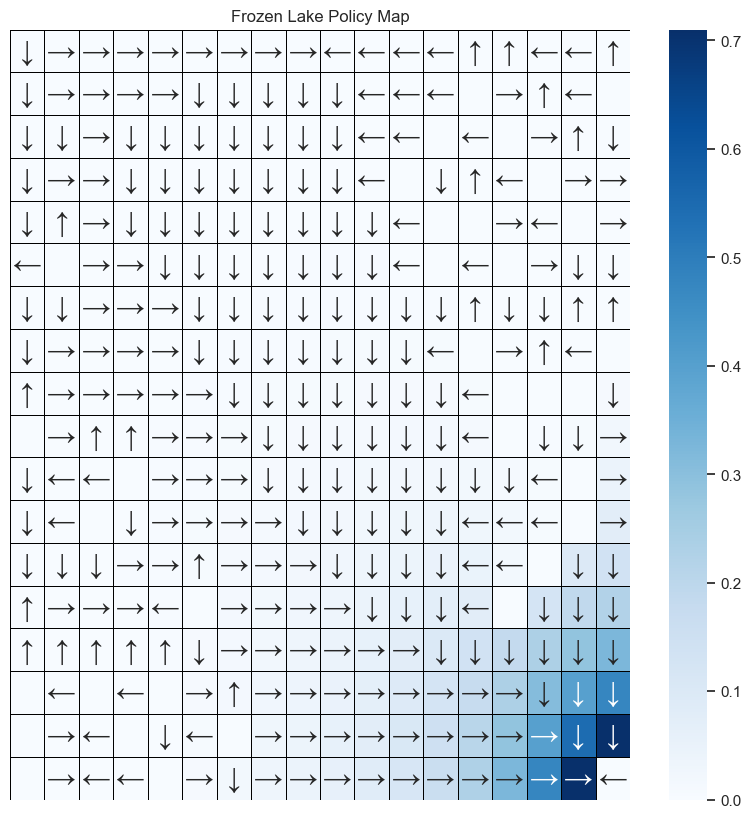

In [43]:
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=7500, gamma=.9, theta=1e-10)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(18,18)
title="Frozen Lake Policy Map"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)

for i in range(len(policy_map)):
    for j in range(len(policy_map[i])):
        if (i, j) in hole_coords:
            policy_map[i][j] = ''

plt.figure(figsize=(10,10))
plot_policy(val_max, policy_map, fl_map_size, title)
plt.savefig('plots/frozen_lake/PI_policy_map.png', dpi=300)

# Q-Learning

## Grid Search

In [45]:
gamma=[.25, .5, .75, .9, .99, 1]
n_iters = [10000]
epsilon_decay=[.25, .5, .75, .9, .99, 1]
GridSearch.q_learning_grid_search(frozen_lake, gamma=gamma, iters=n_iters, epsilon_decay=epsilon_decay)

running q_learning with gamma: 0.25 epsilon decay: 0.25  iterations: 10000


runtime = 5.64 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.25 epsilon decay: 0.5  iterations: 10000


runtime = 5.58 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.25 epsilon decay: 0.75  iterations: 10000


runtime = 5.47 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.25 epsilon decay: 0.9  iterations: 10000


runtime = 5.41 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.25 epsilon decay: 0.99  iterations: 10000


runtime = 5.44 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.25 epsilon decay: 1  iterations: 10000


runtime = 5.40 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 0.25  iterations: 10000


runtime = 5.68 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 0.5  iterations: 10000


runtime = 5.63 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 0.75  iterations: 10000


runtime = 5.52 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 0.9  iterations: 10000


runtime = 5.36 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 0.99  iterations: 10000


runtime = 5.37 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 1  iterations: 10000


runtime = 5.43 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.75 epsilon decay: 0.25  iterations: 10000


runtime = 5.84 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.75 epsilon decay: 0.5  iterations: 10000


runtime = 5.58 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.75 epsilon decay: 0.75  iterations: 10000


runtime = 5.49 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.75 epsilon decay: 0.9  iterations: 10000


runtime = 5.40 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.75 epsilon decay: 0.99  iterations: 10000


runtime = 5.50 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.75 epsilon decay: 1  iterations: 10000


runtime = 5.41 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.25  iterations: 10000


runtime = 5.68 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.5  iterations: 10000


runtime = 5.57 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.75  iterations: 10000


runtime = 5.50 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 10000


runtime = 5.43 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.99  iterations: 10000


runtime = 5.40 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 1  iterations: 10000


runtime = 5.40 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.25  iterations: 10000


runtime = 5.59 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.5  iterations: 10000


runtime = 5.52 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.75  iterations: 10000


runtime = 5.48 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 10000


runtime = 5.38 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.99  iterations: 10000


runtime = 5.37 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 1  iterations: 10000


runtime = 5.41 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 1 epsilon decay: 0.25  iterations: 10000


runtime = 5.67 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 1 epsilon decay: 0.5  iterations: 10000


runtime = 5.57 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 1 epsilon decay: 0.75  iterations: 10000


runtime = 5.50 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 1 epsilon decay: 0.9  iterations: 10000


runtime = 5.53 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 1 epsilon decay: 0.99  iterations: 10000


runtime = 5.36 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 1 epsilon decay: 1  iterations: 10000


runtime = 5.56 seconds
Avg. episode reward:  0.0
###################


  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 5.41 seconds


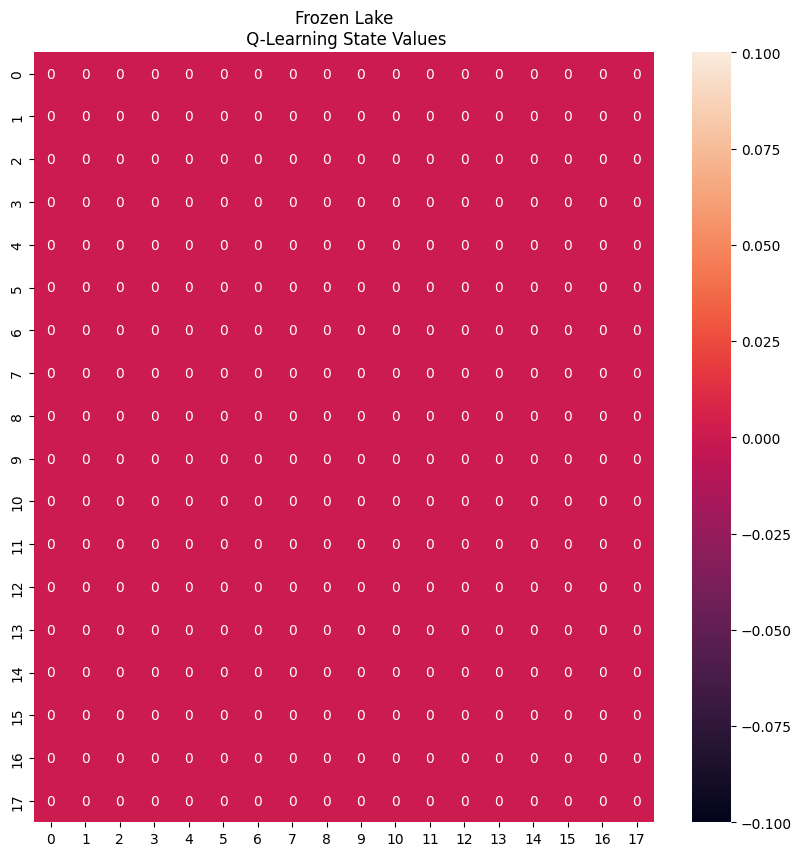

In [6]:
# run Q-Learning
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)


#plot state values
size=(18,18)
plt.figure(figsize=(10,10))
values_heat_map(V, "Frozen Lake\n Q-Learning State Values", size)
plt.savefig('plots/frozen_lake/QLearning_state_values.png', dpi=300)

In [56]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)

In [57]:
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({0.0: 10000})
0.0


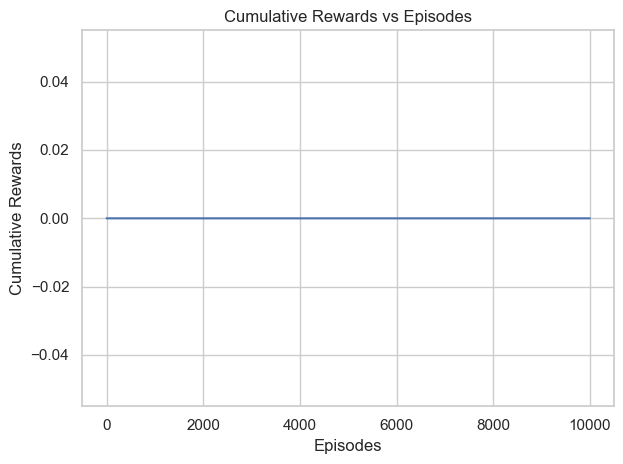

In [58]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_rewards_episodes.png', dpi=300)

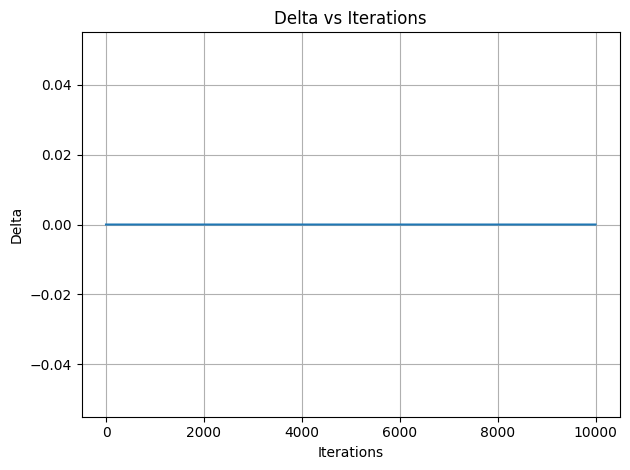

In [8]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
delta_values = [np.max(np.abs(Q_track[i] - Q_track[i-1])) for i in range(1, len(Q_track))]
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title("Delta vs Iterations")
plt.plot(delta_values)
plt.grid()
plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_delta.png', dpi=300)

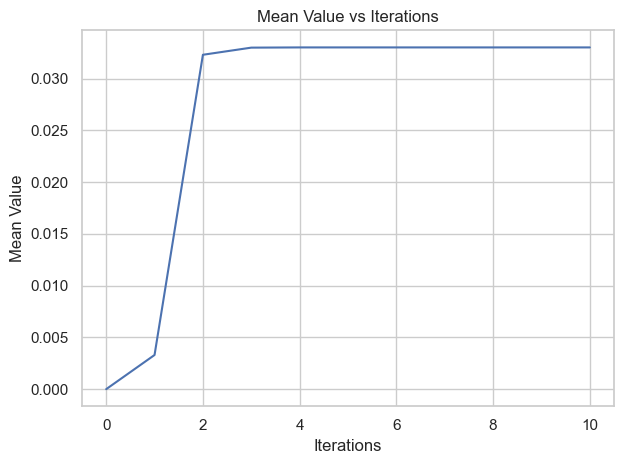

In [59]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_opt_val_iters.png', dpi=300)

runtime = 5.48 seconds


runtime = 5.51 seconds


runtime = 5.51 seconds


runtime = 5.49 seconds


runtime = 5.51 seconds


runtime = 5.46 seconds


runtime = 5.53 seconds


runtime = 5.62 seconds


runtime = 5.69 seconds


runtime = 5.86 seconds


runtime = 5.43 seconds


runtime = 5.44 seconds


runtime = 5.59 seconds


runtime = 5.63 seconds


runtime = 5.71 seconds


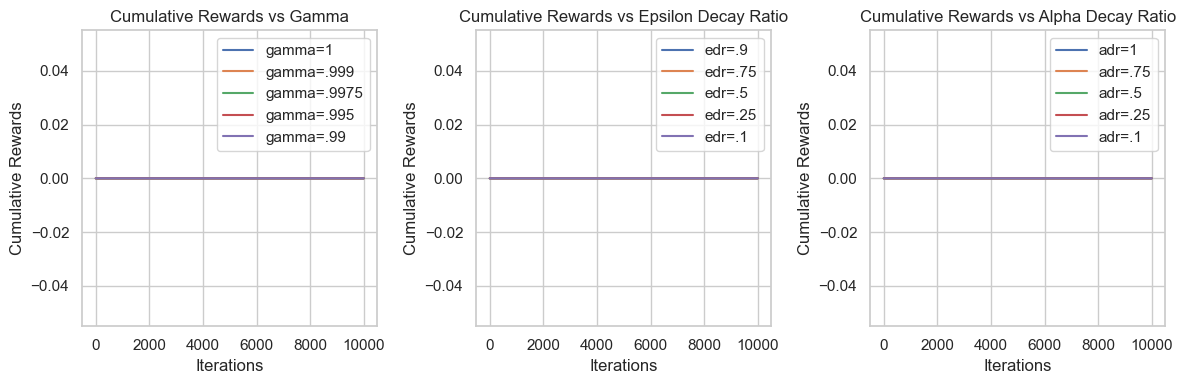

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# run VI
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.999)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.995)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='edr=.9')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='edr=.75')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='edr=.5')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='edr=.25')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='edr=.1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Epsilon Decay Ratio')
ax2.legend()

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, alpha_decay_ratio=1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax3.plot(theta10, label='adr=1')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax3.plot(theta9, label='adr=.75')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax3.plot(theta5, label='adr=.5')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax3.plot(theta2, label='adr=.25')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax3.plot(theta1, label='adr=.1')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cumulative Rewards')
ax3.set_title('Cumulative Rewards vs Alpha Decay Ratio')
ax3.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_hyperparams_rewards.png', dpi=300)

runtime = 5.45 seconds
[['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '←' '←' '']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '←' '←' '' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '' '←' '←' '' '←']
 ['←' '' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '←' '←' '']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '' '' '←']
 ['' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '←' '←']
 ['←' '←' '←' '' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←']
 ['←' '←' '' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '' '←' '←']
 ['←' '←' '←' '←' '←' '' '

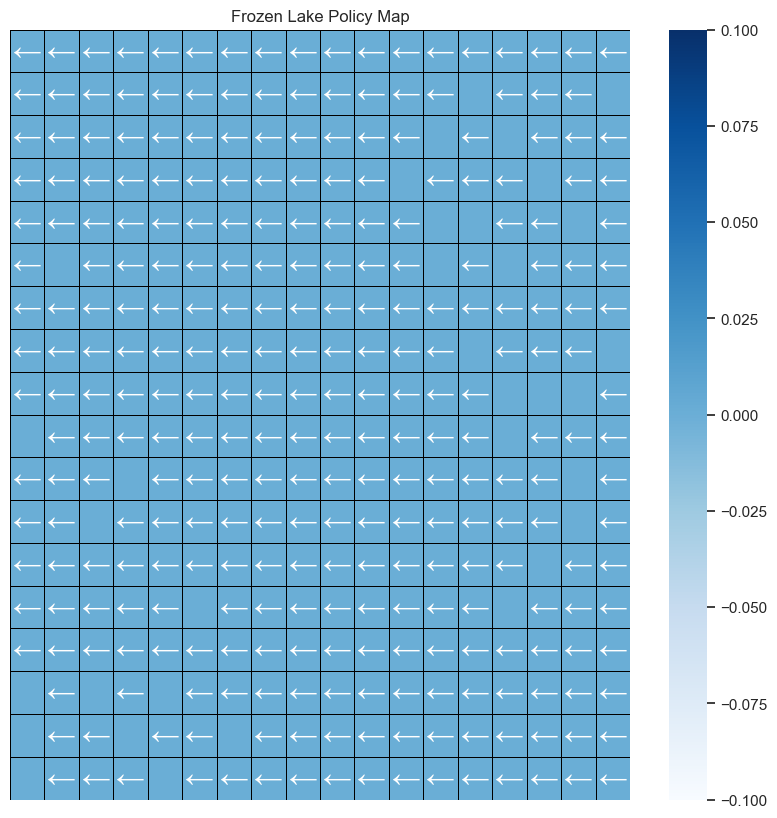

In [54]:
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(18,18)
title="Frozen Lake Policy Map"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)

for i in range(len(policy_map)):
    for j in range(len(policy_map[i])):
        if (i, j) in hole_coords:
            policy_map[i][j] = ''
print(policy_map)
plt.figure(figsize=(10,10))
plot_policy(val_max, policy_map, fl_map_size, title)
plt.savefig('plots/frozen_lake/QLearning_policy_map.png', dpi=300)